<a href="https://colab.research.google.com/github/anagha1112/CAR_PRICE_MODEL_BASIC/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install requests
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file.
    Args:
      url: The URL of the file to download.
      filename: The name of the file to save the downloaded data to.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{filename}' downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

download(file_path, "usedcars.csv") # Remove the await keyword as download function is not defined as async
file_name="usedcars.csv"

File 'usedcars.csv' downloaded successfully.


In [ ]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm


LinearRegression()

In [ ]:
#make a prediction with the feature highway-mpg

X =df[['highway-mpg']]
Y = df['price']

#fit the linear model

lm.fit(X,Y)

#predicting using the model
yhat = lm.predict(X)
yhat[0:5]


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
#checking value of intercept and slope

print(lm.intercept_,lm.coef_)

38423.3058581574 [-821.73337832]


### Multiple Linear Regression


In [ ]:
#Make prediction of price using multiple features

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])


LinearRegression()

In [ ]:
#finding coef and slopw

print(lm.coef_,lm.intercept_)


[53.49574423  4.70770099 81.53026382 36.05748882] -15806.62462632922


In [ ]:
#Model Evaluation
import seaborn as sns
%matplotlib inline



(0.0, 48171.13441382341)

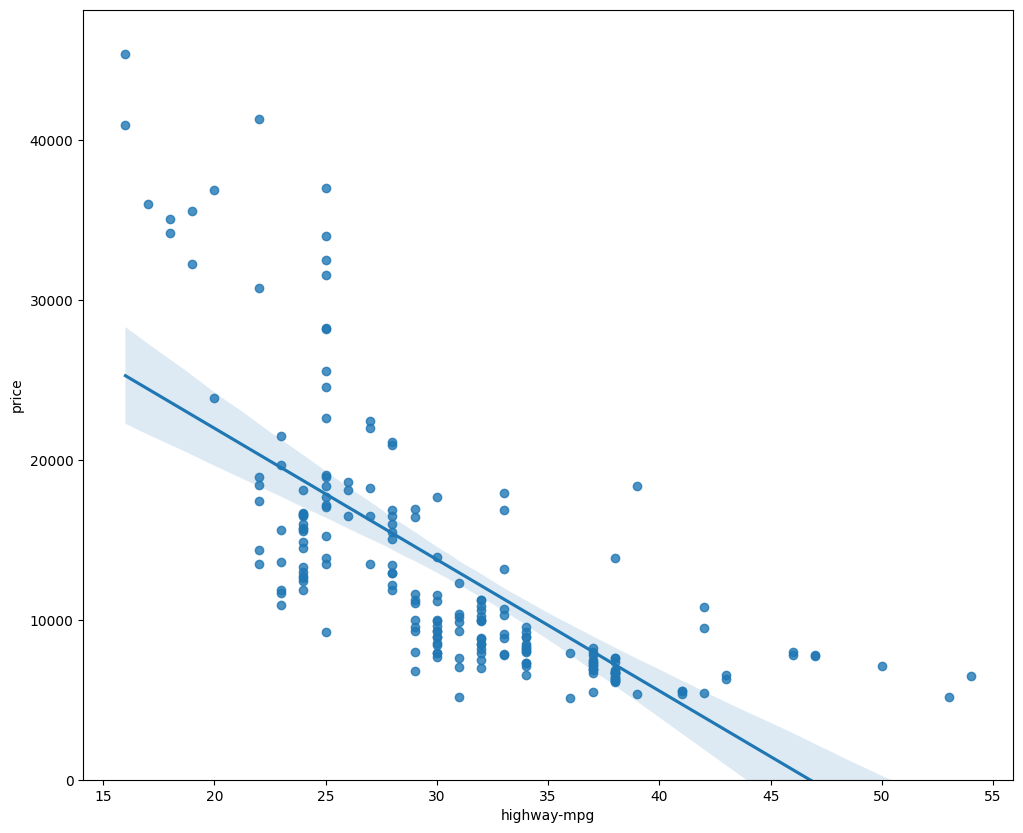

In [ ]:
#Regression plots suits better for Linear Regression Models (Combination of scatter plot and fitted regression line)

#lete check highway-mpg as potential predictor variable of price

width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data =df)
plt.ylim(0,)



In [ ]:
#As from regplot there is negative correlation between price and highway-mpg
#check data points scattered , If the data is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

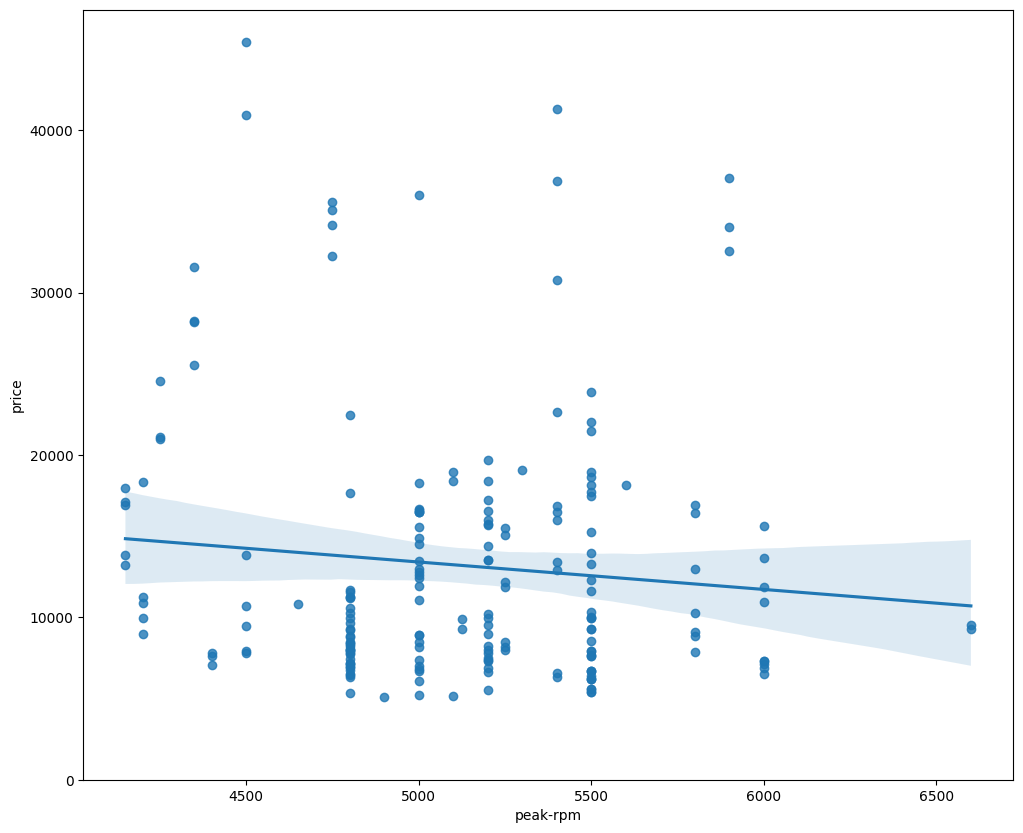

In [ ]:
#make plot for peak-rpm
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

#from the plot for peak-rpm the data points are scattered more from the line than highway-mpg

In [ ]:
# check which is more correlated

df[['peak-rpm','highway-mpg','price']].corr()

#highway-mpg is more corelated to price

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
#RESIDUAL PLOTS
#difference between the observed value (y) and the predicted value (Yhat) is called
# the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.
#If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
#randomly spread out around the x-axis means variance is constant so linear model is good fit

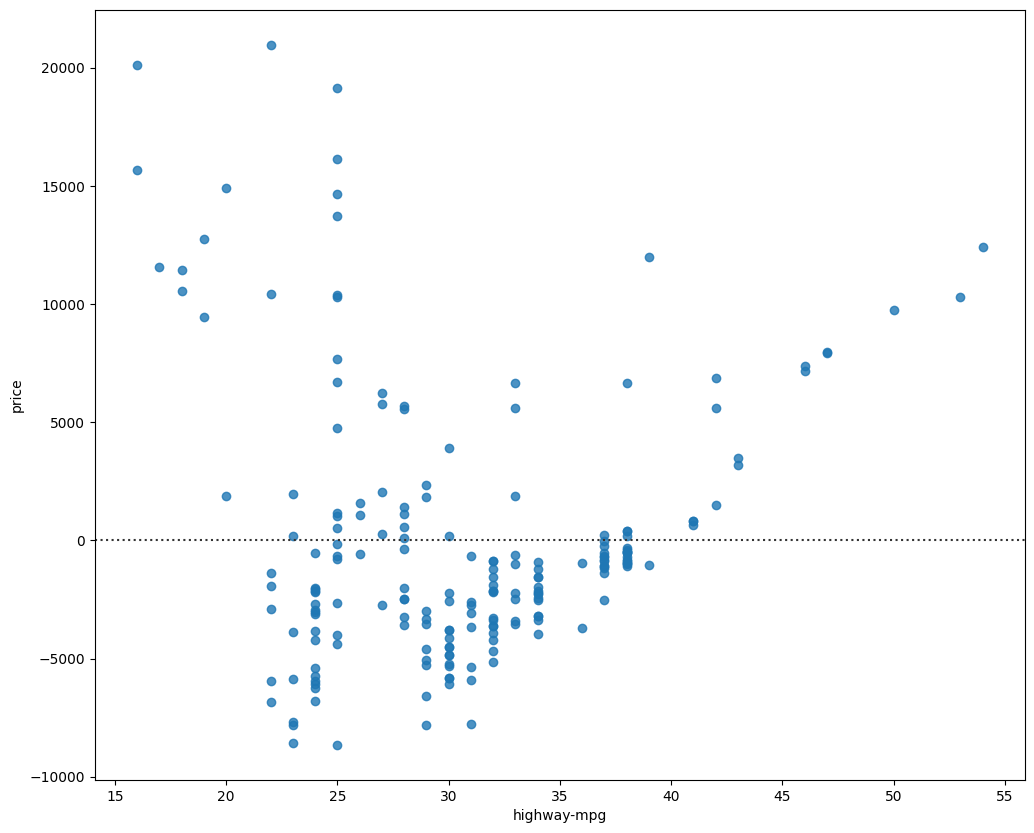

In [ ]:
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [ ]:
#the residuals are not randomly spread around the x-axis, so  maybe a non-linear model is more appropriate for this data.


In [ ]:
#For Multiple Linear Regressin model cant use regression and residual plots
#SO USE DISTRIBUTION PLOTS - see distribution of fitted values that result from the model and
#compare it to the distribution of the actual values.

In [ ]:
y_hat = lm.predict(Z)

<ipython-input-28-4f897d77671c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-28-4f897d77671c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" 

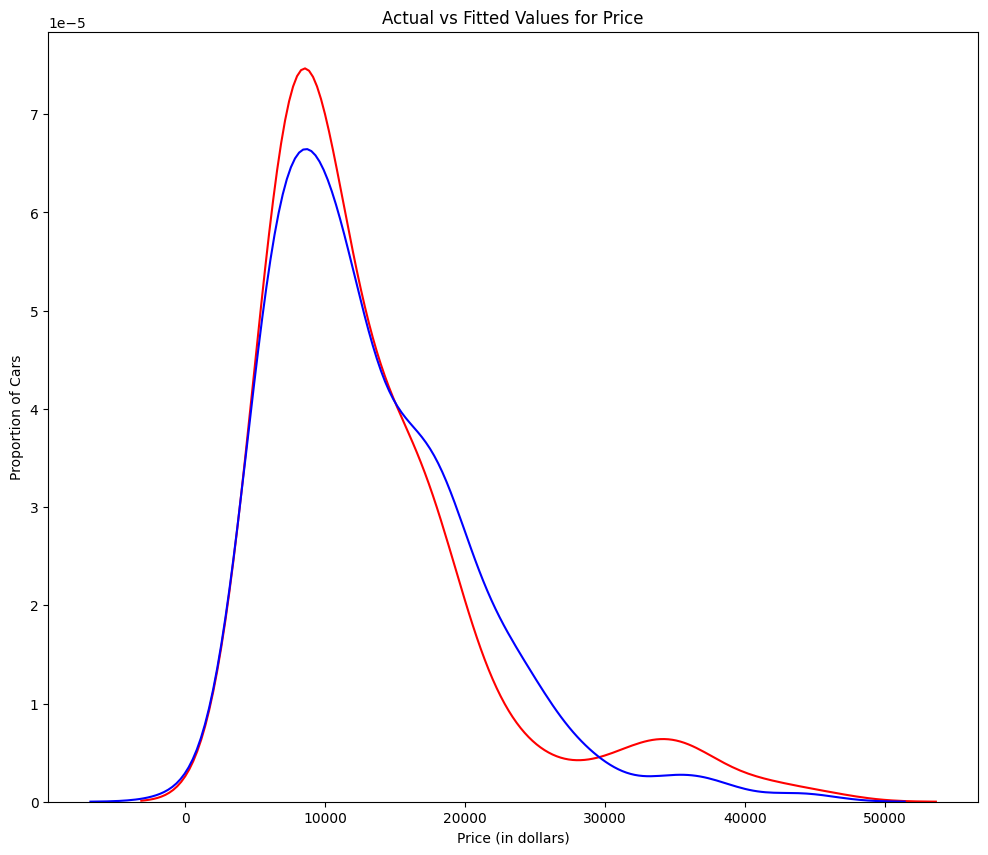

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
#fitted values are almost close to actual but need more accurate

### Polynomial Regression and pipeline


In [ ]:
#non linear realtionships with higher order terms of predictor variables
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
#use a polynomial of order 3
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


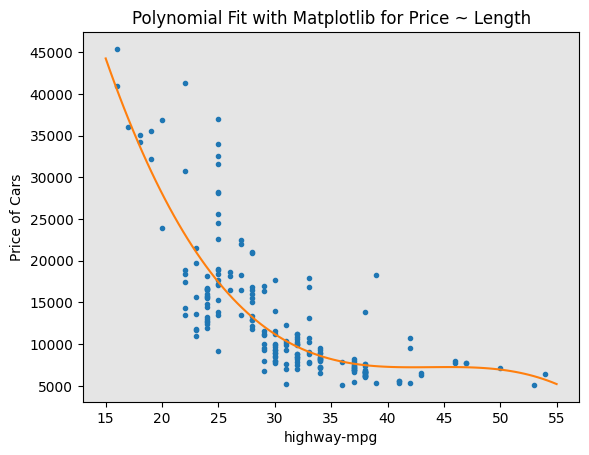

In [ ]:
#plotting the function
PlotPolly(p,x,y,'highway-mpg')

In [ ]:
#Performing a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures
#create polynomialfeature object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr = pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape # z has 4 features and z_pr have 15 features

(201, 15)

### Pipeline


In [ ]:
#for simplifying the processing of data
#use module Pipeline to create a pipeline and use StandarsScaler as a step in our pipeline


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

#Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

#so here we can normalize the data, perform a transform and produce a prediction simultaneously.

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [ ]:
#To determine accuracy of the model
# 1. R-Squared - how close the data is to fitted line - the model with the higher R-squared value is a better fit for the data.
#2.MSE - diff between actual and predicted value square average - the model with the smallest MSE value is a better fit for the data.


#SIMPLE LINEAR REGRESSION
lm.fit(X,Y)
lm.score(X,Y) #49.659% of the variation of the price is explained by this simple linear model "highway-mpg"


0.4965911884339176

In [ ]:
Yhat=lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print(mse)

31635042.944639888


In [ ]:
#for multiple linear regression use R^2
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))  #80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"

The R-square is:  0.8093562806577457


In [ ]:
#for polynomial to calculate R^2
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print( r_squared) #67.419 % of the variation of price is explained by this polynomial fit.



0.674194666390652


In [ ]:
mean_squared_error(df['price'], p(x)) #calculate mse for polynomialfit

20474146.426361218

When comparing mse and R^2 fro three models we fitted SLR, MLR and Polynomial,
Comparing SLR and MLR -> MLR have less MSE and high R^2 -> so MLR good fit
Comparing SLR and Polynomial -> Polynomial have less MSE and high R^2 -> so Polynomial is good fit
Comparing MLR and Polynomial -> MLR have less MSE and high R^2 ->So MLR is overall good fit

So, we can choose MLR as good fit for this model